<a href="https://colab.research.google.com/github/elnemr19/Autism-prediction/blob/main/Autism_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dev**

In [ ]:
# Dataset link : https://drive.google.com/drive/folders/15qI3Xv9SpgCezzpL38ejCrkBEdEUKLrw?usp=sharing

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

train =pd.read_csv(r'/content/drive/MyDrive/Dataset/Autism_prediction_ML/train.csv')
df =train.copy()
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [ ]:
df.shape

(800, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.582500,0.493455,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.286250,0.452290,0.000000,0.000000,0.000000,1.000000,1.000000
A3_Score,800.0,0.321250,0.467249,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.457500,0.498502,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.208750,0.406670,0.000000,0.000000,0.000000,0.000000,1.000000
A7_Score,800.0,0.273750,0.446161,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.717500,0.450497,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.316250,0.465303,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.describe(include='O')

,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,age_desc,relation
count,800,800,800,800,800,800,800,800
unique,2,12,2,2,61,2,1,6
top,f,White-European,no,no,United States,no,18 and more,Self
freq,415,211,604,683,148,765,800,617


**Data Cleaning**

In [ ]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,211
?,151
Asian,134
Middle Eastern,116
Black,45
Latino,44
South Asian,35
Others,24
Pasifika,18


In [ ]:
df['relation'].value_counts()

,count
relation,
Self,617
?,77
Parent,49
Relative,43
Health care professional,7
Others,7


In [ ]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

In [ ]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,211
Others,177
Asian,134
Middle Eastern,116
Black,45
Latino,44
South Asian,35
Pasifika,18
Hispanic,16


**Exploratory Data Analysis**

In [ ]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,615
1,185


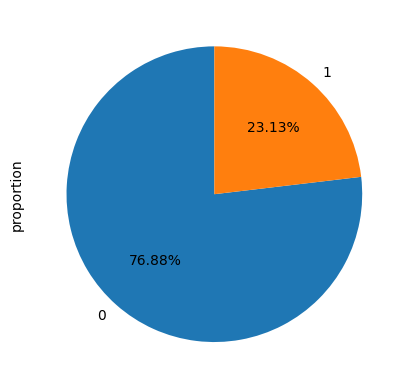

In [ ]:
df['Class/ASD'].value_counts(normalize =  True).plot.pie(autopct='%2.2f%%', startangle=90)
plt.show()

In [ ]:
ints = []
objects = []
floats = []

for col in df.columns:
    if np.issubdtype(df[col].dtype, np.integer):
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

In [ ]:
objects

['gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation']

In [ ]:
ints

['ID',
 'A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'jaundice',
 'austim',
 'used_app_before',
 'Class/ASD']

In [ ]:
floats

['age', 'result']

In [ ]:
ints.remove('ID')
ints.remove('Class/ASD')

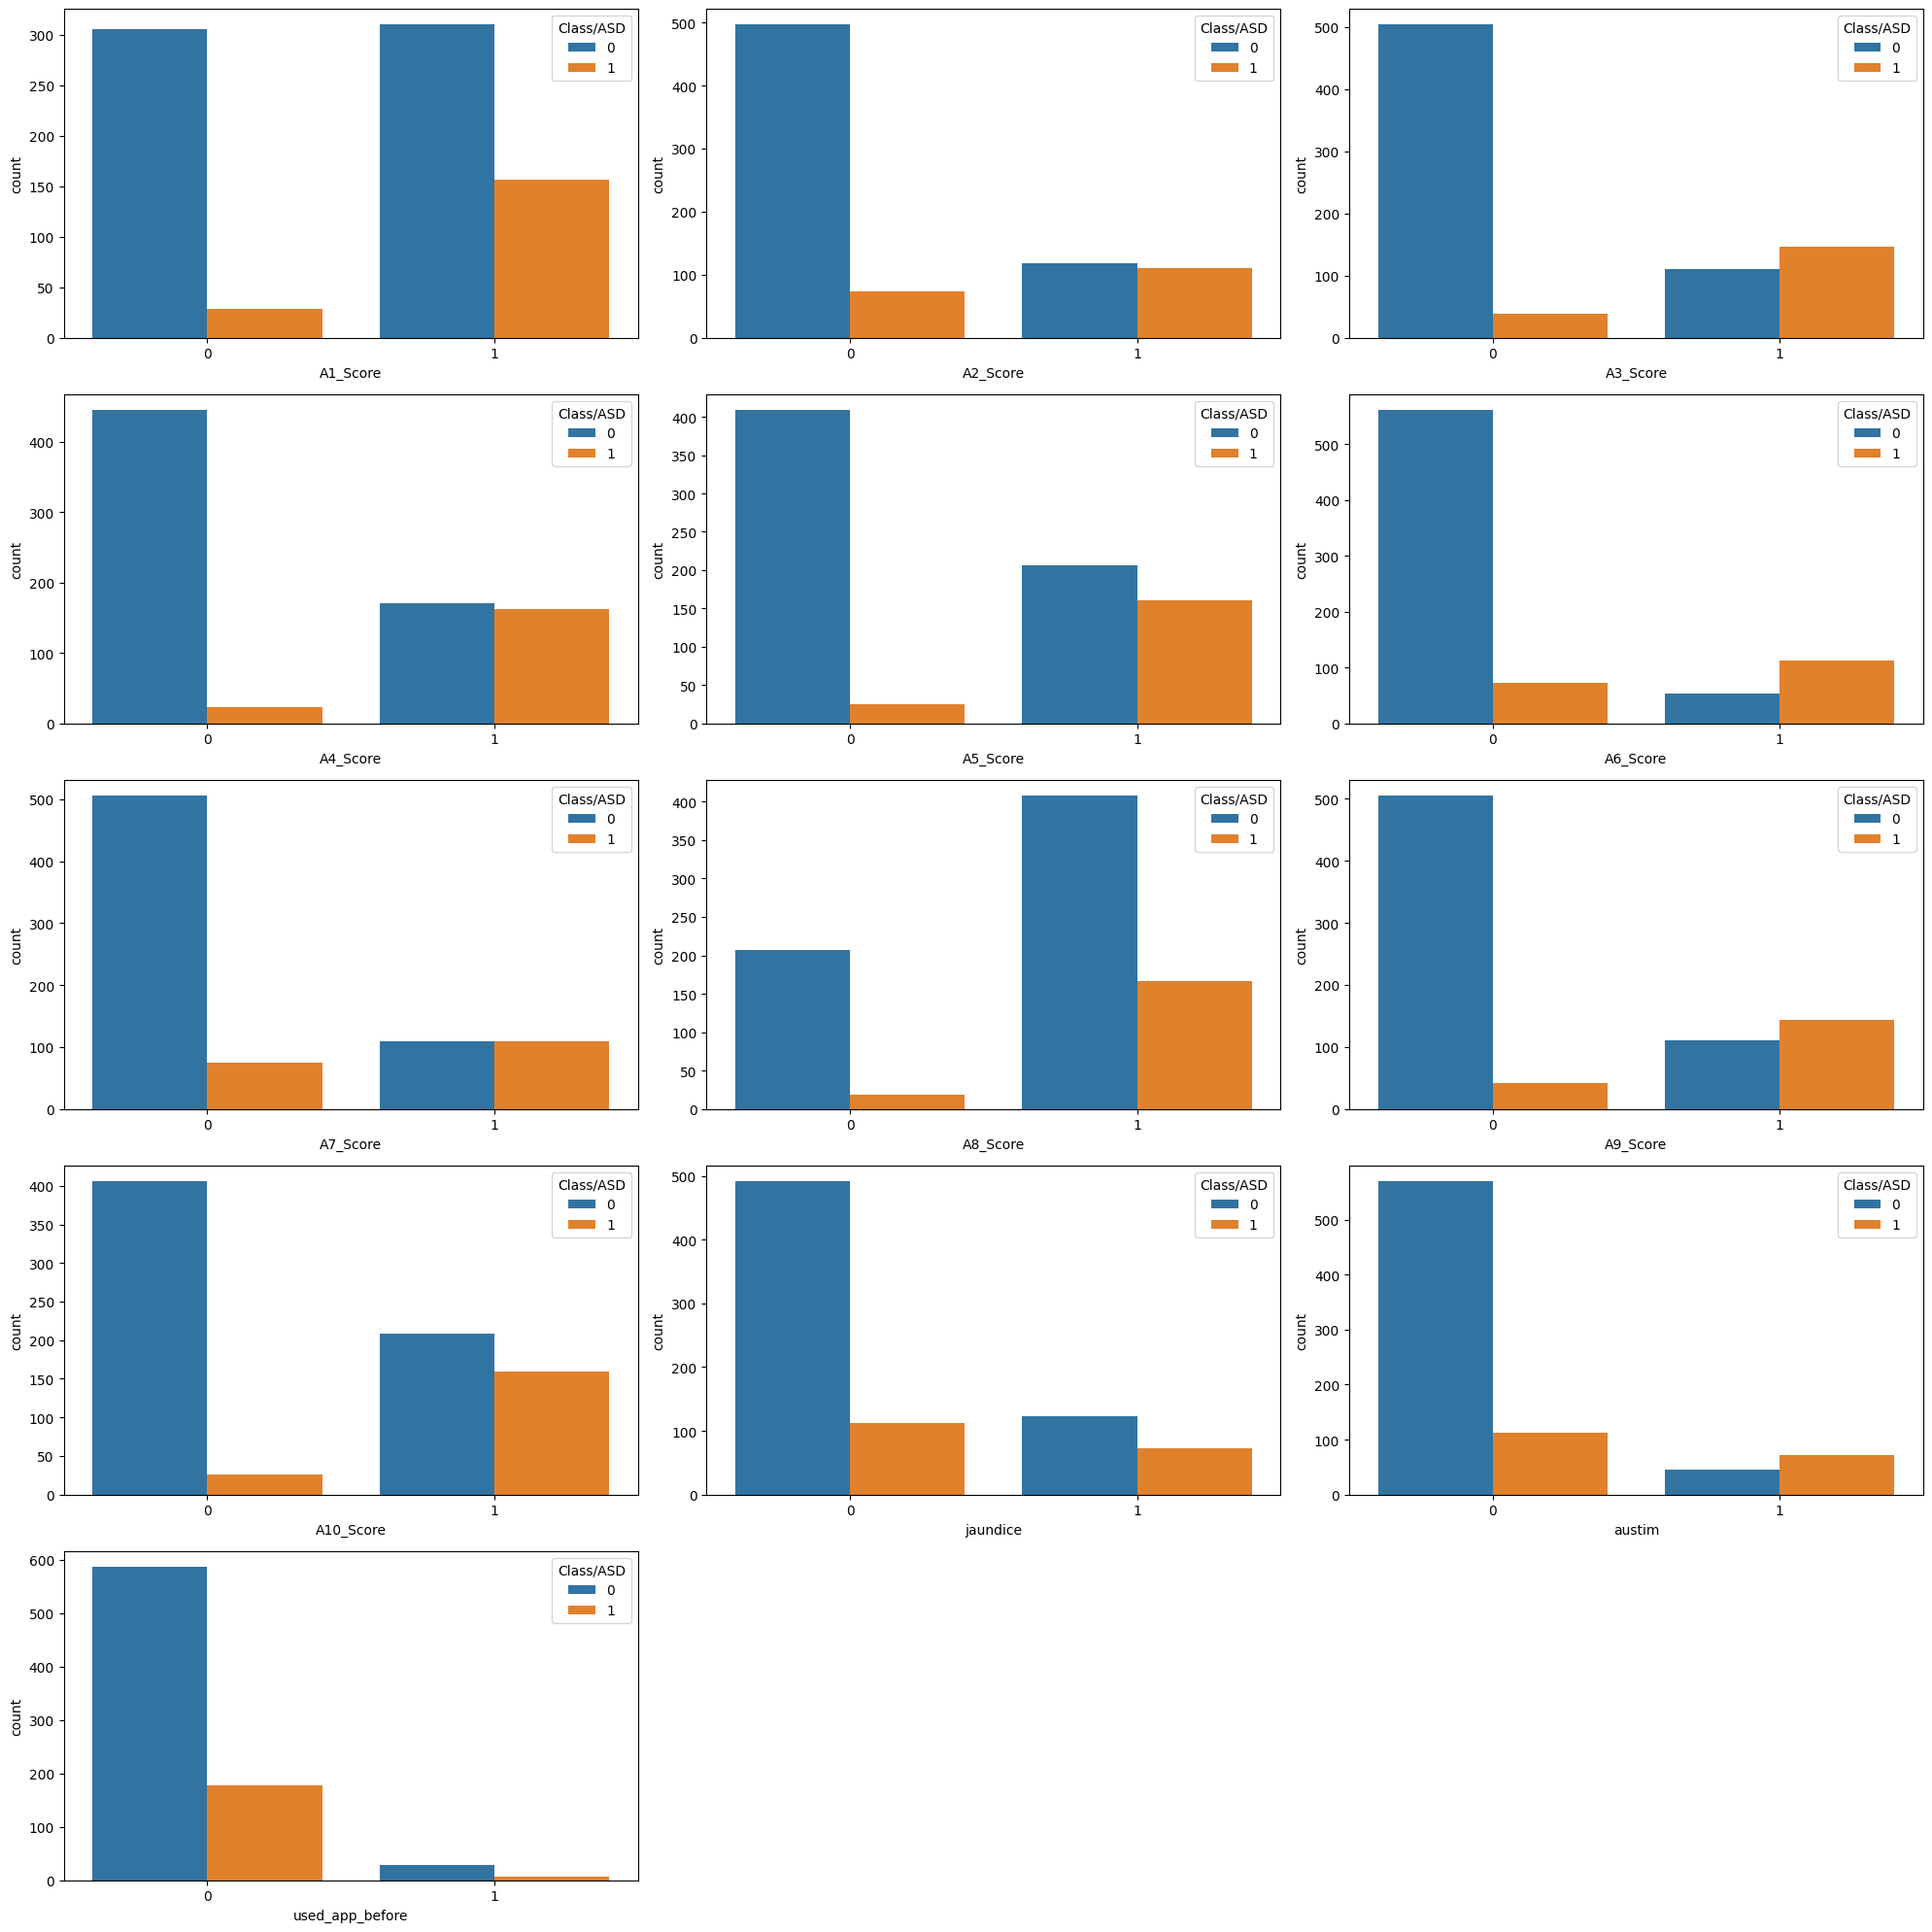

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.subplots(figsize=(20, 20))

for i, col in enumerate(ints):
    plt.subplot(5, 3, i + 1)
    sb.countplot(x=str(col), hue='Class/ASD', data=df)

plt.tight_layout()
plt.show()

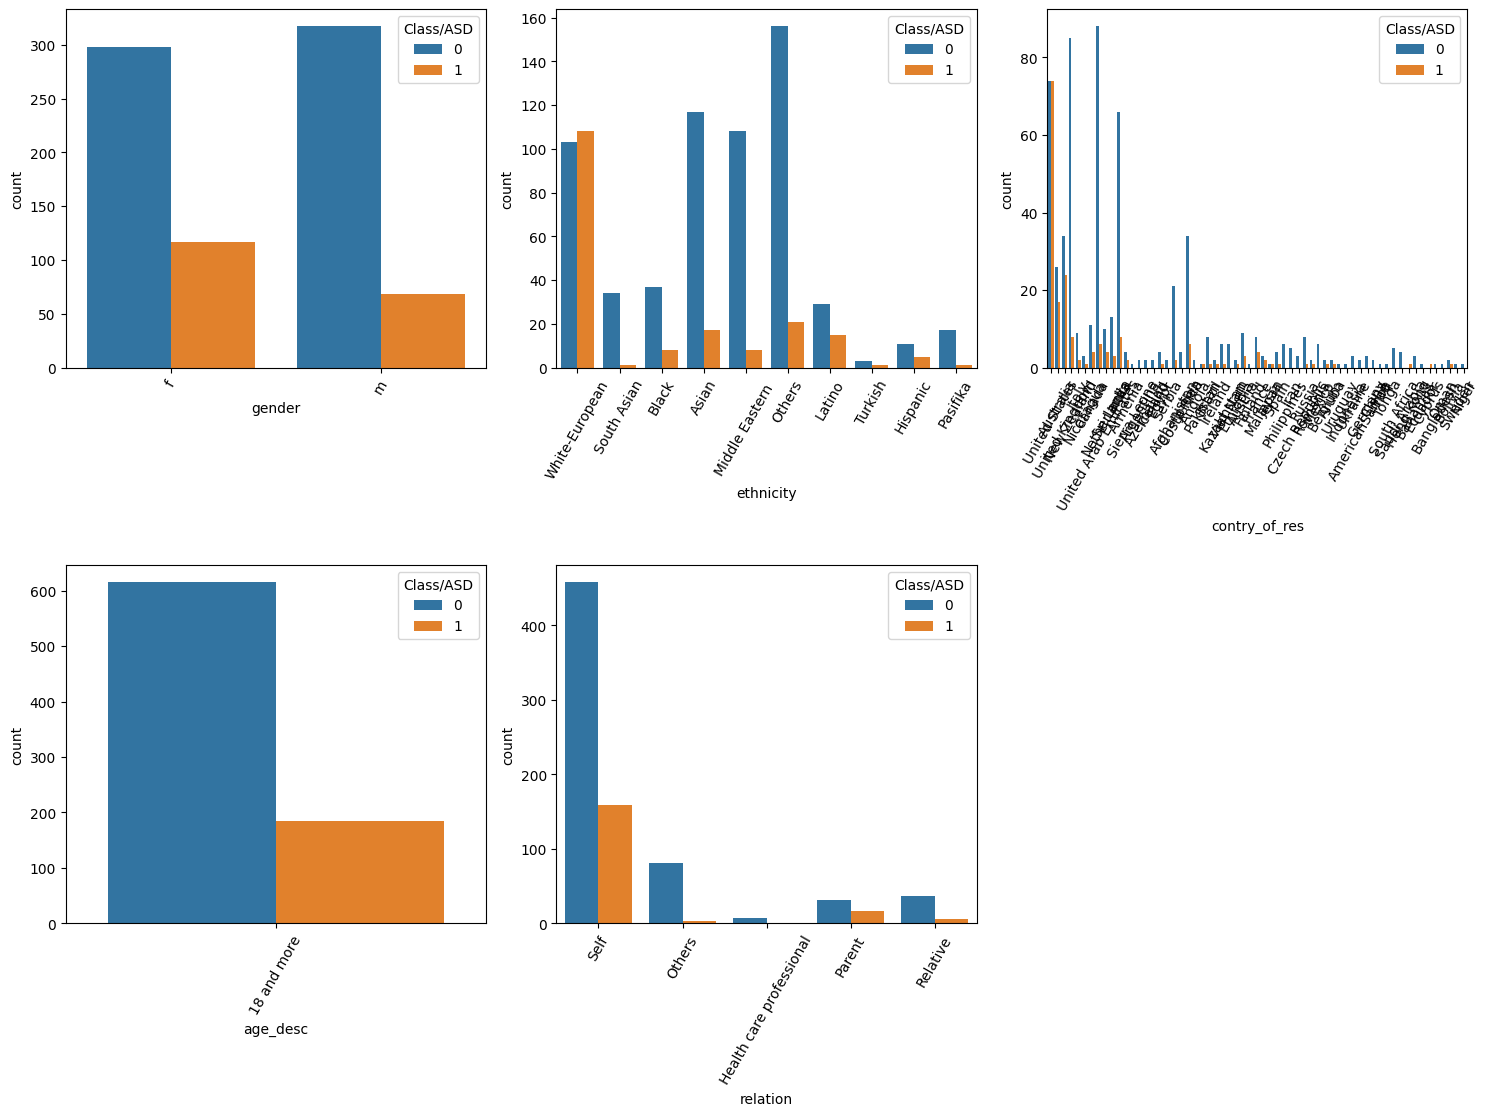

In [ ]:
plt.subplots(figsize=(15, 15))

for i, col in enumerate(objects):
    plt.subplot(3, 3, i+1)
    sb.countplot(x=col  ,data =df, hue='Class/ASD')
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

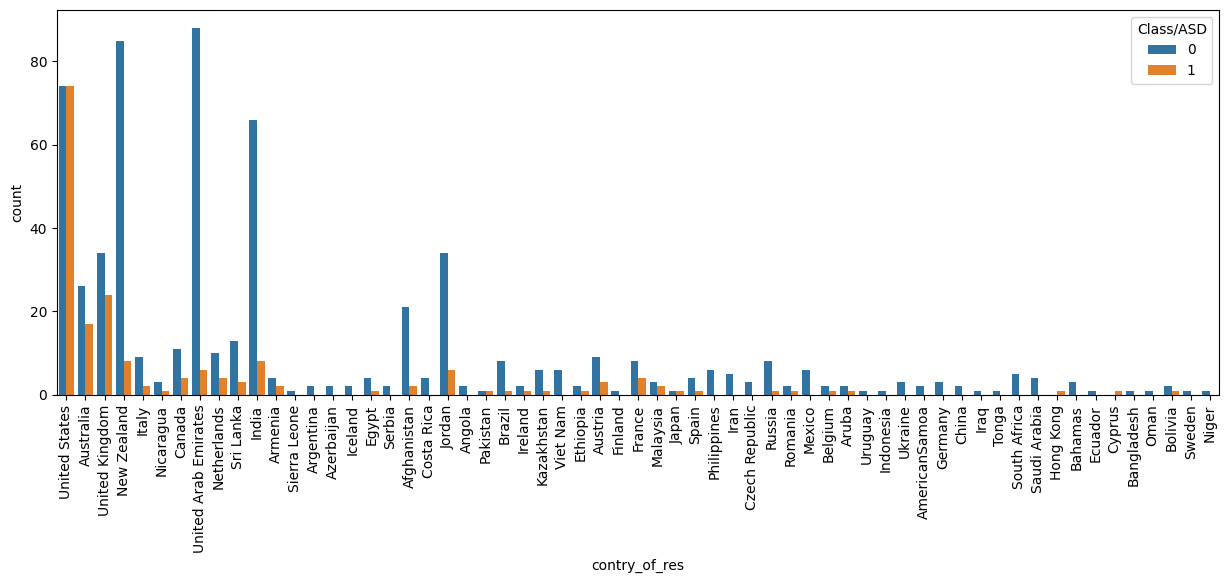

In [ ]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

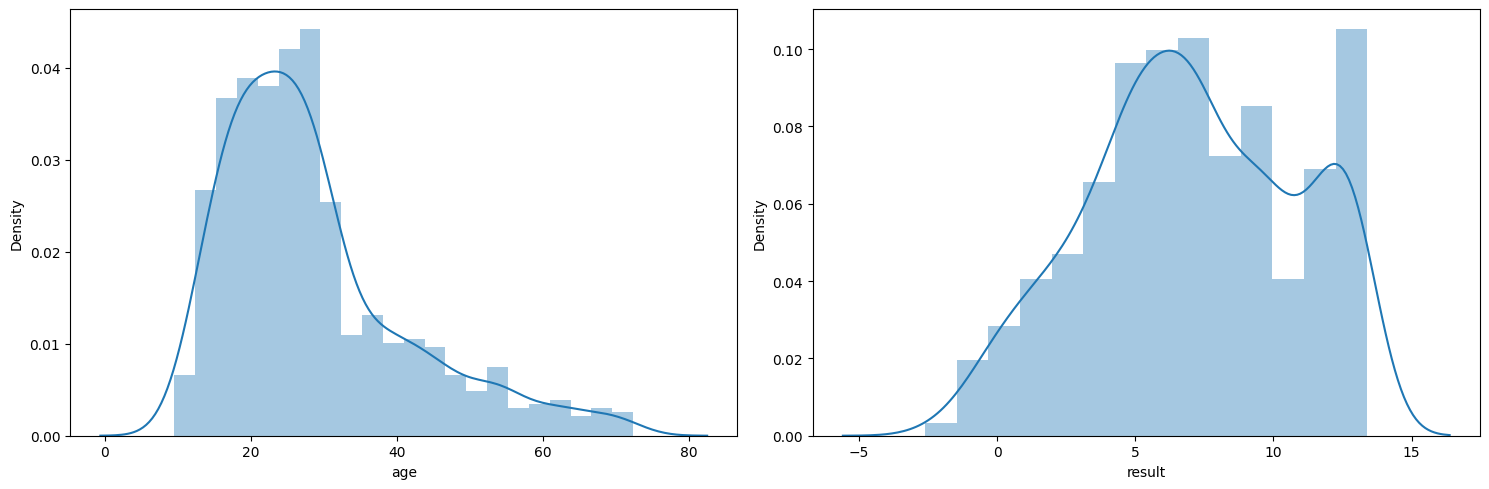

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

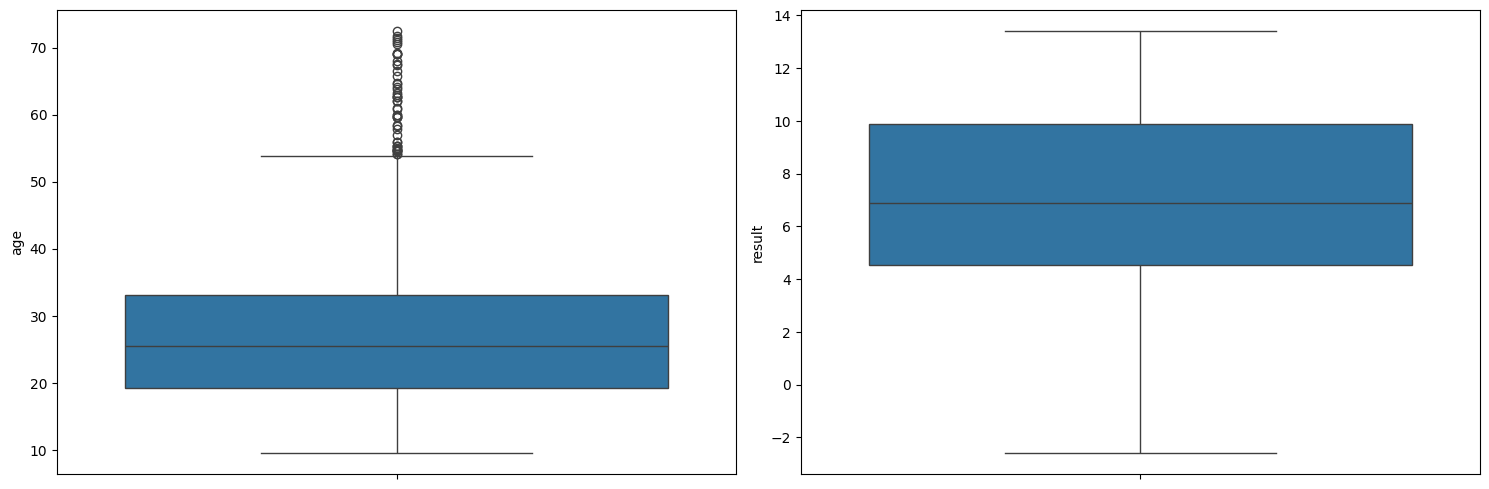

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

**Feature** **Engineering**

In [ ]:
df['age'].head()

,age
0,18.605397
1,13.829369
2,14.679893
3,61.035288
4,14.256686


In [ ]:
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

In [ ]:
#  df['ageGroup']

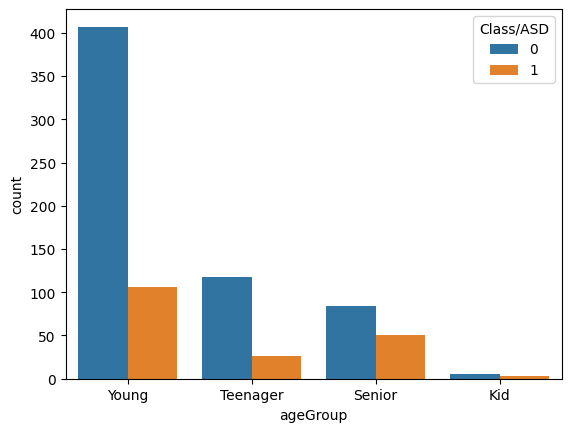

In [ ]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [ ]:
def add_feature(data):
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:
    data['sum_score'] += data[col]

  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']
  return data


df = add_feature(df)

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,ageGroup,sum_score,ind
0,1,1,0,1,1,1,1,0,1,1,...,0,United States,0,7.819715,18 and more,Self,0,Young,8,0
1,2,0,0,0,0,0,0,0,0,0,...,0,Australia,0,10.544296,18 and more,Others,0,Teenager,1,0
2,3,1,1,1,1,1,1,0,0,1,...,0,United Kingdom,0,13.167506,18 and more,Self,1,Teenager,8,0
3,4,0,0,0,1,0,0,0,0,0,...,0,New Zealand,0,1.530098,18 and more,Others,0,Senior,1,0
4,5,0,0,0,0,1,0,0,0,1,...,1,Italy,0,7.949723,18 and more,Self,0,Teenager,3,1


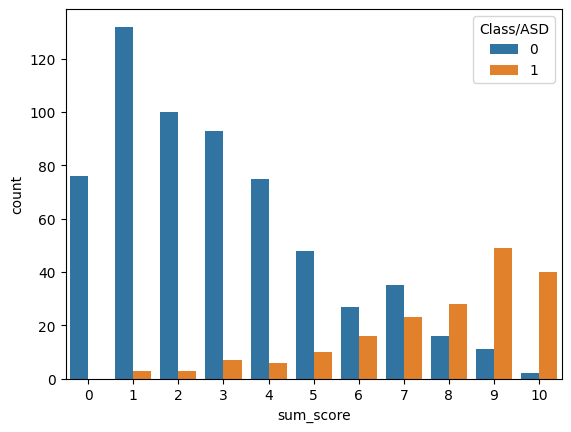

In [ ]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [ ]:
df['age'] = df['age'].apply(lambda x: np.log(x))

In [ ]:
df['age']

,age
0,2.923452
1,2.626795
2,2.686479
3,4.111452
4,2.657226
5,2.745872
6,3.061847
7,3.364881
8,3.010914
9,2.888403


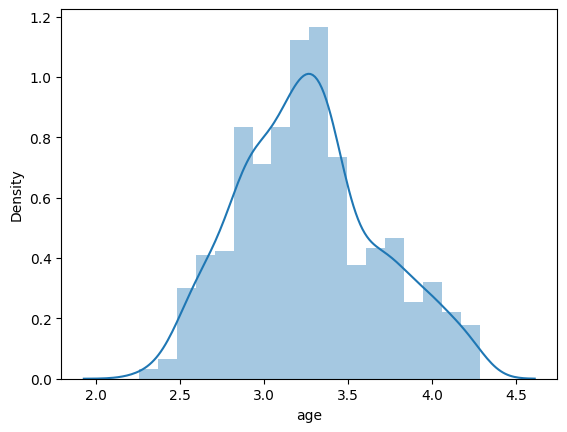

In [ ]:
sb.distplot(df['age'])
plt.show()

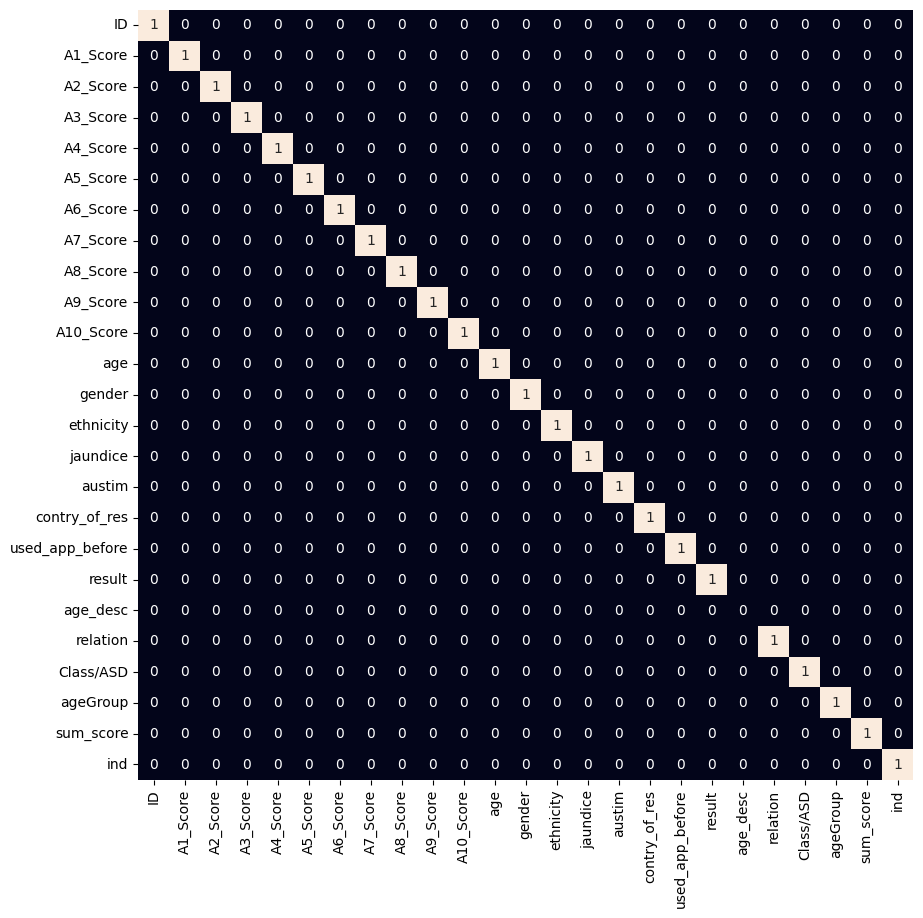

In [ ]:
def encode_labels(data):
    for col in data.columns:
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)

plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

#**Model NN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [ ]:
smote = SMOTE(random_state=42)
features_resampled, target_resampled = smote.fit_resample(features, target)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(features_resampled, target_resampled, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=64, validation_data=(X_val_scaled, Y_val), callbacks=[early_stopping])


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5062 - loss: 0.7587 - val_accuracy: 0.7724 - val_loss: 0.5832
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6365 - loss: 0.6289 - val_accuracy: 0.7764 - val_loss: 0.5167
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7156 - loss: 0.5636 - val_accuracy: 0.7846 - val_loss: 0.4650
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7574 - loss: 0.5056 - val_accuracy: 0.7886 - val_loss: 0.4465
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7984 - loss: 0.4906 - val_accuracy: 0.7805 - val_loss: 0.4404
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8075 - loss: 0.4512 - val_accuracy: 0.7967 - val_loss: 0.4377
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8011 - loss: 0.4767 - val_accuracy: 0.8008 - val_loss: 0.4314
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8106 - loss: 0.4515 - val_accuracy: 0.8049 - 

In [ ]:
y_pred_train = model.predict(X_train_scaled)
y_pred_val = model.predict(X_val_scaled)

accuracy_train = accuracy_score(Y_train, (y_pred_train > 0.5).astype(int))
accuracy_val = accuracy_score(Y_val, (y_pred_val > 0.5).astype(int))

print(f'Training Set: Accuracy = {accuracy_train:.4f}')
print(f'Validation Set: Accuracy = {accuracy_val:.4f}')


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Set: Accuracy = 0.9512
Validation Set: Accuracy = 0.9065


**This visualization**
shows the training history of a neural network model, with two subplots: "Model Loss over Epochs" and "Model Accuracy over Epochs". The loss and accuracy are plotted against the number of epochs, representing how well the model is performing on the training and validation datasets.

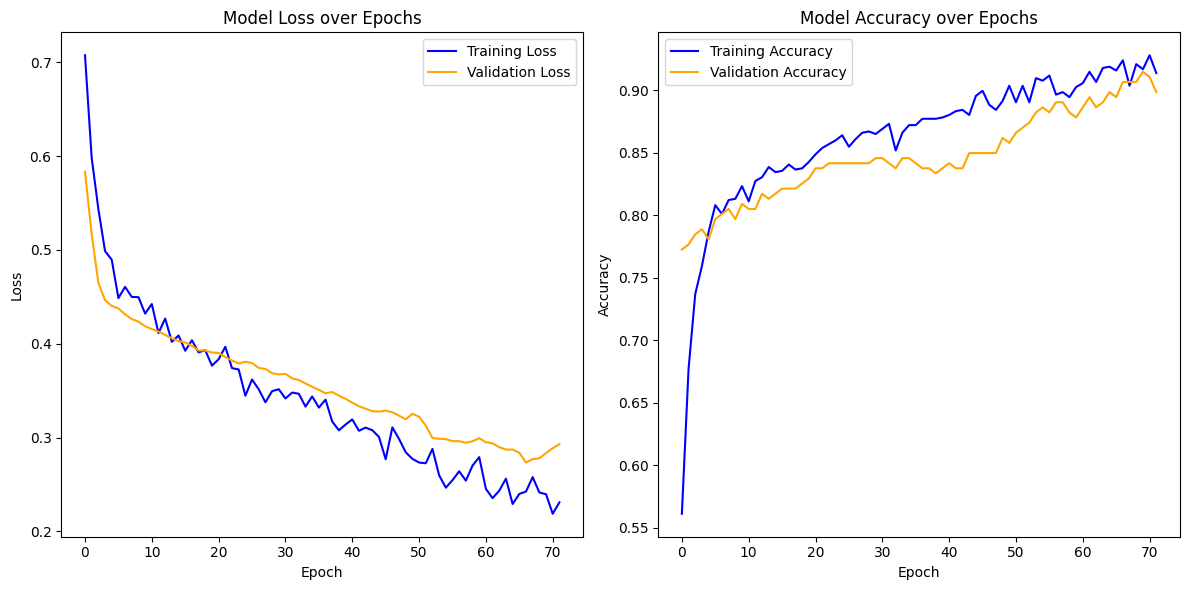

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#**Model LR**





In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10)

ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_train_resampled, Y_train_resampled = ros.fit_resample(X_train, Y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, Y_train_resampled)

train_auc = metrics.roc_auc_score(Y_train_resampled, logistic_model.predict(X_train_scaled))
val_auc = metrics.roc_auc_score(Y_val, logistic_model.predict(X_val_scaled))

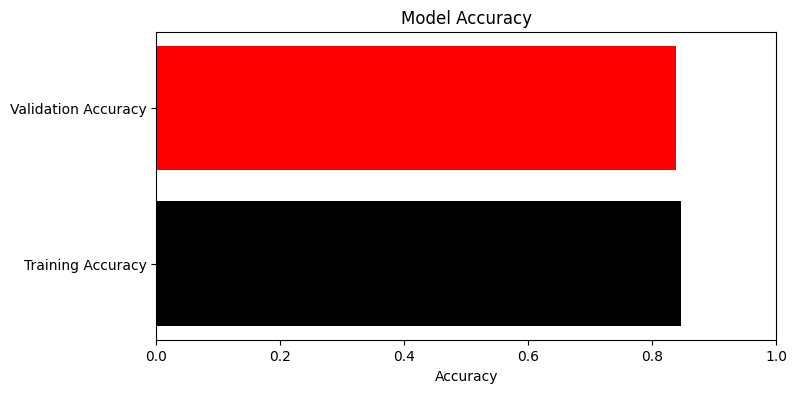

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = logistic_model.score(X_train_scaled, Y_train_resampled)
val_accuracy = logistic_model.score(X_val_scaled, Y_val)

plt.figure(figsize=(8, 4))
plt.barh(['Training Accuracy', 'Validation Accuracy'], [train_accuracy, val_accuracy], color=['black', 'red'])
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
plt.xlim(0, 1)
plt.show()

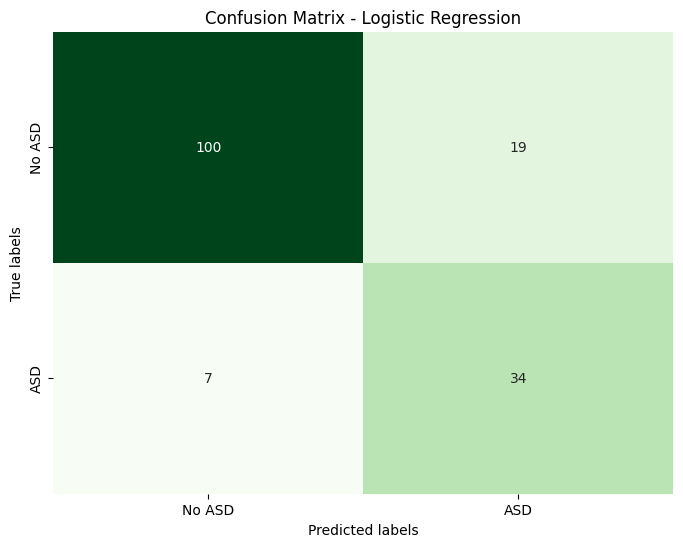

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = logistic_model.predict(X_val_scaled)
cm = confusion_matrix(Y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False,
            xticklabels=['No ASD', 'ASD'], yticklabels=['No ASD', 'ASD'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


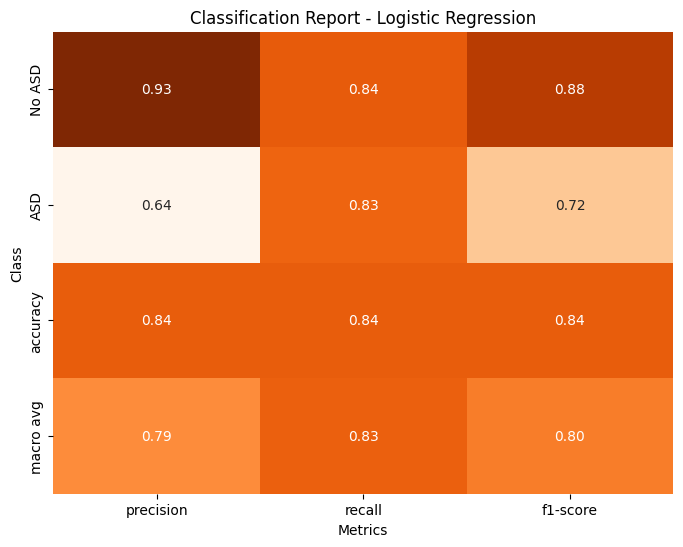

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

y_pred = logistic_model.predict(X_val_scaled)
report = classification_report(Y_val, y_pred, target_names=['No ASD', 'ASD'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Oranges', fmt='.2f', cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report - Logistic Regression')
plt.show()


#**Archive**







**Apply Model With LR & XGBOOST & SVC V1.1**



*   Logistic Regression:
Trains with about 87% accuracy.
Tests with approximately 78% accuracy.
*   XGBoost Classifier:
Achieves 100% accuracy during training.
Tests with around 73% accuracy.
*   Support Vector Classifier:
Trains with about 93% accuracy.
Tests with roughly 78% accuracy.
---

In [ ]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10)

ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(X, Y)
    print(f'{model.__class__.__name__} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
    print()


LogisticRegression : 
Training Accuracy :  0.845766129032258
Validation Accuracy :  0.8348022135683542

XGBClassifier : 
Training Accuracy :  1.0
Validation Accuracy :  0.836441893830703

SVC : 
Training Accuracy :  0.9203629032258065
Validation Accuracy :  0.8398237343717975



---
**Apply Model With LR & XGBOOST & SVC  (Cross-validation)   V1.2**


*  LogisticRegression: Mean AUC: 0.926, Std: 0.023
*  XGBClassifier: Mean AUC: 0.981, Std: 0.016
*  SVC: Mean AUC: 0.954, Std: 0.026


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

num_folds = 10
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=10)

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
    cv_results = cross_val_score(model, X, Y, cv=cv_strategy, scoring='roc_auc')
    print(f'{model.__class__.__name__} - Mean AUC: {cv_results.mean()}, Std: {cv_results.std()}')


LogisticRegression - Mean AUC: 0.907494693877551, Std: 0.025706161191408318
XGBClassifier - Mean AUC: 0.9855877551020409, Std: 0.00969705571961513
SVC - Mean AUC: 0.9524555102040818, Std: 0.02090501213891331


---
**Apply Model With RF & XGBOOST & SVC  V 1.3  (Cross-validation) :)**

*   Random Forest: Achieved the highest performance with an average score of 0.993 and low variability.
*   XGBoost: Also performed well with an average score of 0.981 and moderate variability.
*   Support Vector Classifier : Had a lower average score of 0.953 and higher variability




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score

removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10)

ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)


In [ ]:
models = [
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('SVC', SVC(kernel='rbf'))
]

for name, model in models:
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_resampled, Y_resampled, cv=cv_strategy, scoring='roc_auc')
    print(f'{name} - Mean AUC: {cv_results.mean()}, Std: {cv_results.std()}')


Random Forest - Mean AUC: 0.9911101928374656, Std: 0.004329693586347534
XGBoost - Mean AUC: 0.9790866238138966, Std: 0.009211087284868812
SVC - Mean AUC: 0.9491621263136416, Std: 0.004757530917070246


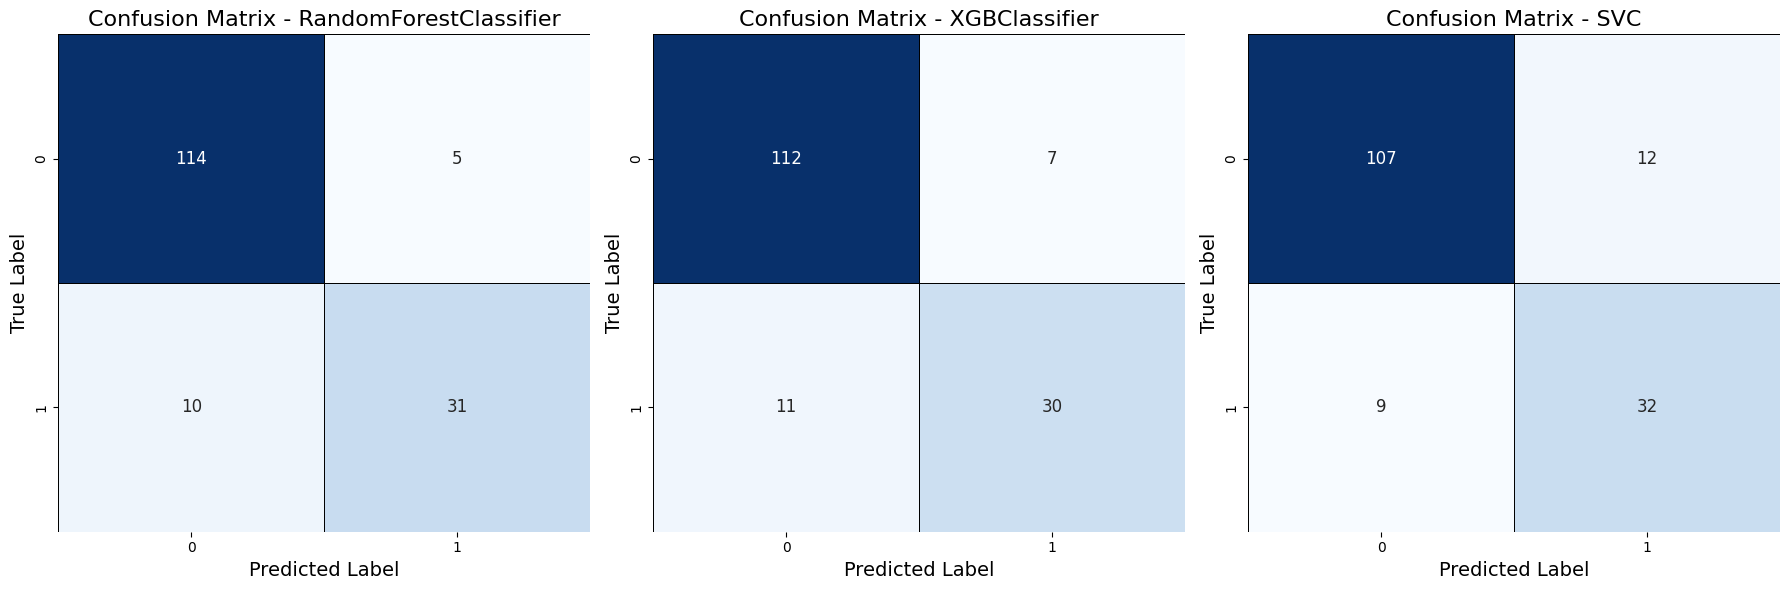

In [ ]:
from sklearn import metrics
import seaborn as sns
plt.figure(figsize=(18, 6))
for i, (name, model) in enumerate(models, start=1):
    plt.subplot(1, len(models), i)
    model.fit(X_resampled, Y_resampled)
    cm = metrics.confusion_matrix(Y_val, model.predict(X_val_scaled))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={'fontsize': 12}, linewidths=0.5, linecolor='black')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.title(model.__class__.__name__)
    plt.ylabel('True Label', fontsize=14)
    plt.title(f'Confusion Matrix - {model.__class__.__name__}', fontsize=16)
plt.tight_layout()
plt.show()
